# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from astropy.table import QTable, vstack

# V infinity vs IP

In [2]:
NASA_SENTRY_table_sum = QTable.read('data/nasa_ipcum.ecsv', format='ascii.ecsv')

In [3]:
def plot_vinf_ip(table, vinf_col='v_inf', ip_col='ip'):
    # Extract data
    v_inf = np.array(table[vinf_col], dtype=float)
    ip = np.array(table[ip_col], dtype=float)
    
    clean_mask = np.isfinite(v_inf) & np.isfinite(ip) & (ip > 0)
    v_inf = v_inf[clean_mask]
    ip = ip[clean_mask]

    # Round V_inf to group by every 1 km/s
    bin_size = 1
    v_inf_binned = np.round(v_inf / bin_size) * bin_size

    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))

    sns.set_style('whitegrid')

    sns.lineplot(
        x = v_inf_binned,
        y = ip,
        estimator = np.median,
        errorbar = ('pi', 100),
        color = 'green',
        linewidth = 2,
        ax = ax,
        label = 'Median IP'
    )

    ax.set_yscale('log')
    ax.invert_xaxis()

    ax.set_title(r"NASA Sentry Impact Probability vs. $V_{inf}$")
    ax.set_ylabel("Cumulative Impact Probability (log)")
    ax.set_xlabel("$V_{inf}$ (km/s)")
    ax.legend();

    plt.show()

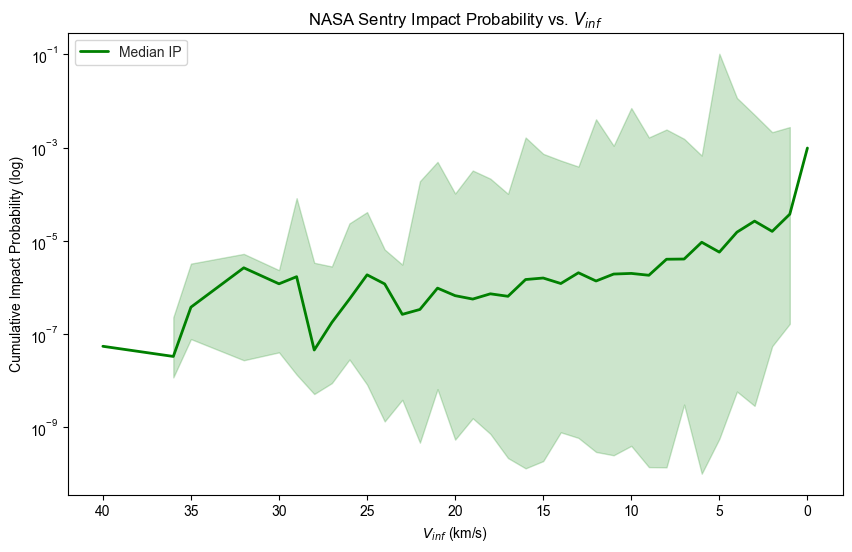

In [4]:
plot_vinf_ip(NASA_SENTRY_table_sum)